# Ejercicio 1: Análisis Exploratorio de Datos

In [5]:
import pandas as pd

# Cargar los datos de precios
precios_2021 = pd.read_excel('PRECIOS 2021.xlsx', engine='openpyxl')
precios_2022 = pd.read_excel('PRECIOS 2022.xlsx', engine='openpyxl')
precios_2023 = pd.read_excel('PRECIOS 2023.xlsx', engine='openpyxl')
precios_2024 = pd.read_excel('PRECIOS 2024.xlsx', engine='openpyxl')

# Cargar los datos de consumo e importación
consumo = pd.read_excel('CONSUMO.xlsx', engine='openpyxl')
importacion = pd.read_excel('IMPORTACION.xlsx', engine='openpyxl')

In [7]:
# Verifica las primeras filas de los datos para identificar problemas en los encabezados
print(precios_2021.head())
print(precios_2022.head())
print(precios_2023.head())
print(precios_2024.head())

            Unnamed: 0 Tipo de Cambio   Superior    Regular     Diesel  \
0                FECHA        GTQ/USD  GTQ/GALON  GTQ/GALON  GTQ/GALON   
1  2021-01-01 00:00:00        7.79382      21.91      21.11      17.61   
2  2021-01-02 00:00:00        7.79382      21.91      21.11      17.61   
3  2021-01-03 00:00:00        7.79382      21.91      21.11      17.61   
4  2021-01-04 00:00:00        7.79417      21.91      21.11      17.61   

      Bunker Glp Cilindro 25Lbs. Unnamed: 7  
0  GTQ/GALON       GTQ/CIL 25 LB     GTQ/LB  
1       13.4                  99       3.96  
2       13.4                  99       3.96  
3       13.4                  99       3.96  
4      13.45                  99       3.96  
            Unnamed: 0 Tipo de Cambio   Superior    Regular     Diesel  \
0                FECHA        GTQ/USD  GTQ/GALON  GTQ/GALON  GTQ/GALON   
1  2022-01-01 00:00:00        7.71912      28.69      27.91      24.51   
2  2022-01-02 00:00:00        7.71912      28.69      27.

In [8]:
# Definir manualmente los encabezados
columnas = ['Fecha', 'Tipo de Cambio', 'Superior', 'Regular', 'Diesel', 'Bunker', 'Glp Cilindro 25Lbs.']

# Leer los datos con encabezados definidos
precios_2021 = pd.read_excel('PRECIOS 2021.xlsx', engine='openpyxl', names=columnas, header=1)
precios_2022 = pd.read_excel('PRECIOS 2022.xlsx', engine='openpyxl', names=columnas, header=1)
precios_2023 = pd.read_excel('PRECIOS 2023.xlsx', engine='openpyxl', names=columnas, header=1)
precios_2024 = pd.read_excel('PRECIOS 2024.xlsx', engine='openpyxl', names=columnas, header=1)

In [9]:
# Convertir la columna 'Fecha' a datetime
precios_2021['Fecha'] = pd.to_datetime(precios_2021['Fecha'], errors='coerce')
precios_2022['Fecha'] = pd.to_datetime(precios_2022['Fecha'], errors='coerce')
precios_2023['Fecha'] = pd.to_datetime(precios_2023['Fecha'], errors='coerce')
precios_2024['Fecha'] = pd.to_datetime(precios_2024['Fecha'], errors='coerce')

# Verifica los tipos de datos
print(precios_2021.dtypes)
print(precios_2022.dtypes)
print(precios_2023.dtypes)
print(precios_2024.dtypes)

Fecha                  datetime64[ns]
Tipo de Cambio                float64
Superior                      float64
Regular                       float64
Diesel                        float64
Bunker                        float64
Glp Cilindro 25Lbs.           float64
dtype: object
Fecha                  datetime64[ns]
Tipo de Cambio                float64
Superior                      float64
Regular                       float64
Diesel                        float64
Bunker                          int64
Glp Cilindro 25Lbs.           float64
dtype: object
Fecha                  datetime64[ns]
Tipo de Cambio                float64
Superior                      float64
Regular                       float64
Diesel                        float64
Bunker                          int64
Glp Cilindro 25Lbs.           float64
dtype: object
Fecha                  datetime64[ns]
Tipo de Cambio                float64
Superior                      float64
Regular                       float64
Diesel  

In [10]:
# Revisar valores nulos
print(precios_2021.isnull().sum())
print(precios_2022.isnull().sum())
print(precios_2023.isnull().sum())
print(precios_2024.isnull().sum())

# Opcional: Eliminar filas con valores nulos
precios_2021 = precios_2021.dropna()
precios_2022 = precios_2022.dropna()
precios_2023 = precios_2023.dropna()
precios_2024 = precios_2024.dropna()

Fecha                  0
Tipo de Cambio         0
Superior               0
Regular                0
Diesel                 0
Bunker                 0
Glp Cilindro 25Lbs.    0
dtype: int64
Fecha                  0
Tipo de Cambio         0
Superior               0
Regular                0
Diesel                 0
Bunker                 0
Glp Cilindro 25Lbs.    0
dtype: int64
Fecha                  0
Tipo de Cambio         0
Superior               0
Regular                0
Diesel                 0
Bunker                 0
Glp Cilindro 25Lbs.    0
dtype: int64
Fecha                  5
Tipo de Cambio         0
Superior               0
Regular                0
Diesel                 0
Bunker                 0
Glp Cilindro 25Lbs.    0
dtype: int64


In [11]:
# Concatenar datos de precios en un solo DataFrame
precios = pd.concat([precios_2021, precios_2022, precios_2023, precios_2024], ignore_index=True)

In [14]:
# Mostrar los nombres de las columnas para cada DataFrame
print("Nombres de columnas en 'consumo':")
print(consumo.columns)

print("\nNombres de columnas en 'importacion':")
print(importacion.columns)

print("\nNombres de columnas en 'precios':")
print(precios.columns)


Nombres de columnas en 'consumo':
Index(['Fecha', 'Aceites lubricantes', 'Asfalto', 'Bunker', 'Ceras',
       'Combustible turbo jet', 'Diesel bajo azufre',
       'Diesel ultra bajo azufre', 'Gas licuado de petróleo',
       'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior',
       'Grasas lubricantes', 'Kerosina', 'Mezclas\noleosas', 'Naftas',
       'PetCoke', 'Petróleo crudo', 'Solventes', 'Butano',
       'Diesel alto azufre', 'Orimulsión', 'Total'],
      dtype='object')

Nombres de columnas en 'importacion':
Index(['Fecha', 'Aceites lubricantes', 'Asfalto ', 'Bunker', 'Ceras',
       'Combustible turbo jet', 'Diesel bajo azufre',
       'Diesel ultra bajo azufre', 'Gas licuado de petróleo',
       'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior',
       'Grasas lubricantes', 'Kerosina', 'Mezclas oleosas', 'Naftas',
       'Petcoke', 'Petróleo crudo', 'Solventes', 'Butano',
       'Diesel alto azufre', 'MTBE', 'Orimulsión', 'Petróleo reconstituido',
 

In [15]:
# Ejemplo de ajuste si los nombres de las columnas están en mayúsculas
columnas_consumo = ['GASOLINA SUPER', 'GASOLINA REGULAR', 'DIESEL', 'GAS LICUADO']


In [17]:
# Verificar los nombres de las columnas
print("Nombres de columnas en 'consumo':")
print(consumo.columns.tolist())


Nombres de columnas en 'consumo':
['Fecha', 'Aceites lubricantes', 'Asfalto', 'Bunker', 'Ceras', 'Combustible turbo jet', 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gas licuado de petróleo', 'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior', 'Grasas lubricantes', 'Kerosina', 'Mezclas\noleosas', 'Naftas', 'PetCoke', 'Petróleo crudo', 'Solventes', 'Butano', 'Diesel alto azufre', 'Orimulsión', 'Total']


Columna Gasolina Super no encontrada en el DataFrame.
Columna Gasolina Regular no encontrada en el DataFrame.
Columna Diesel no encontrada en el DataFrame.
Columna Gas Licuado no encontrada en el DataFrame.
Columna Gasolina Super no encontrada en el DataFrame.
Columna Gasolina Regular no encontrada en el DataFrame.
Columna Diesel no encontrada en el DataFrame.
Columna Gas Licuado no encontrada en el DataFrame.


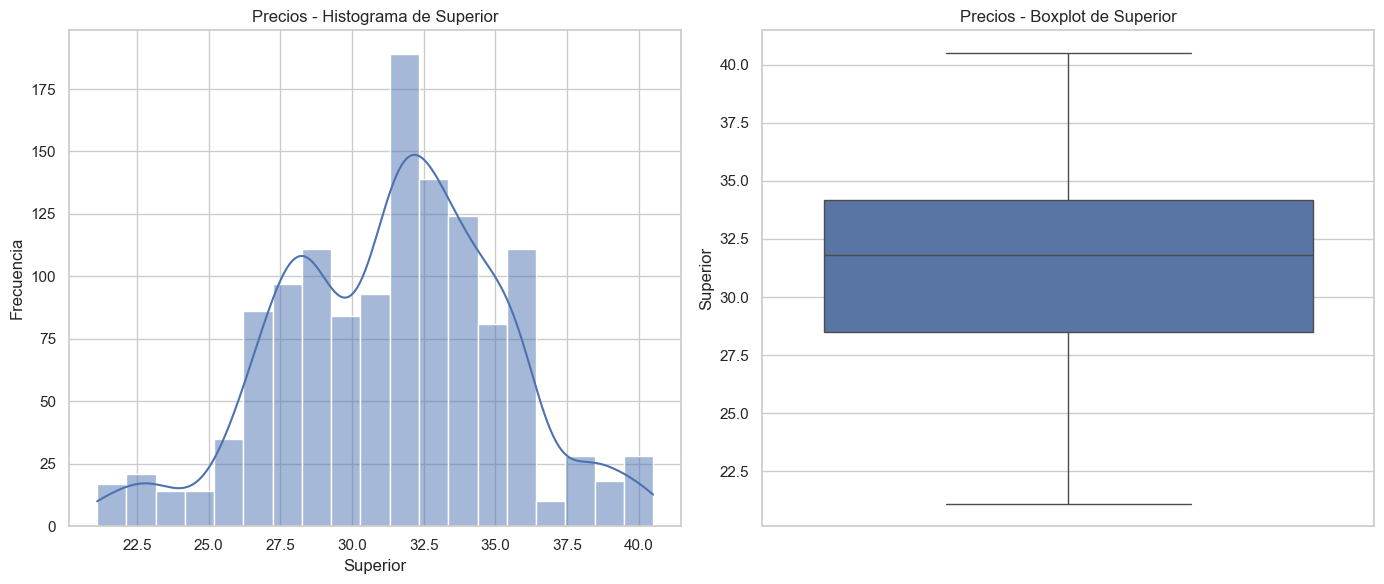

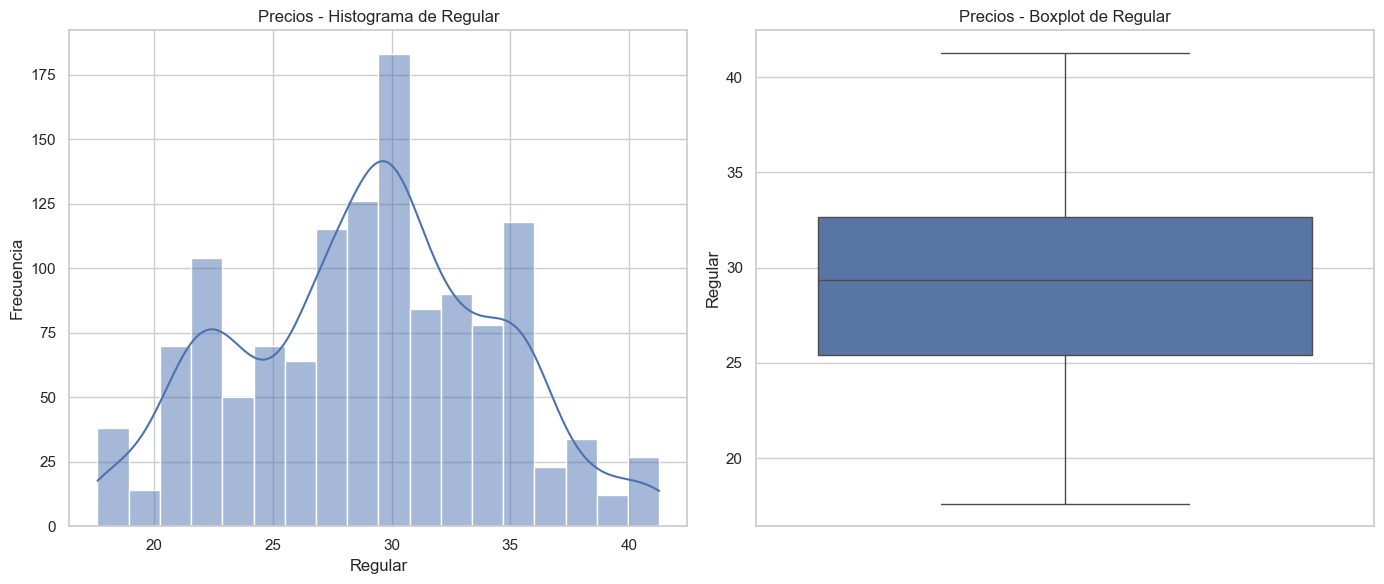

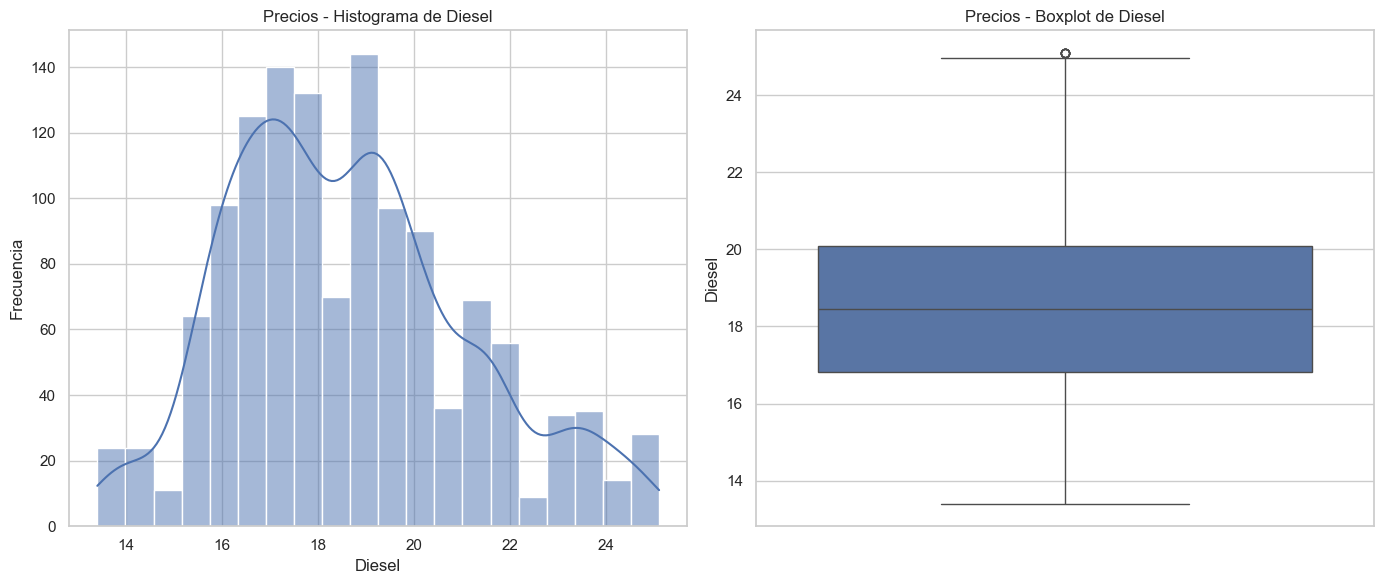

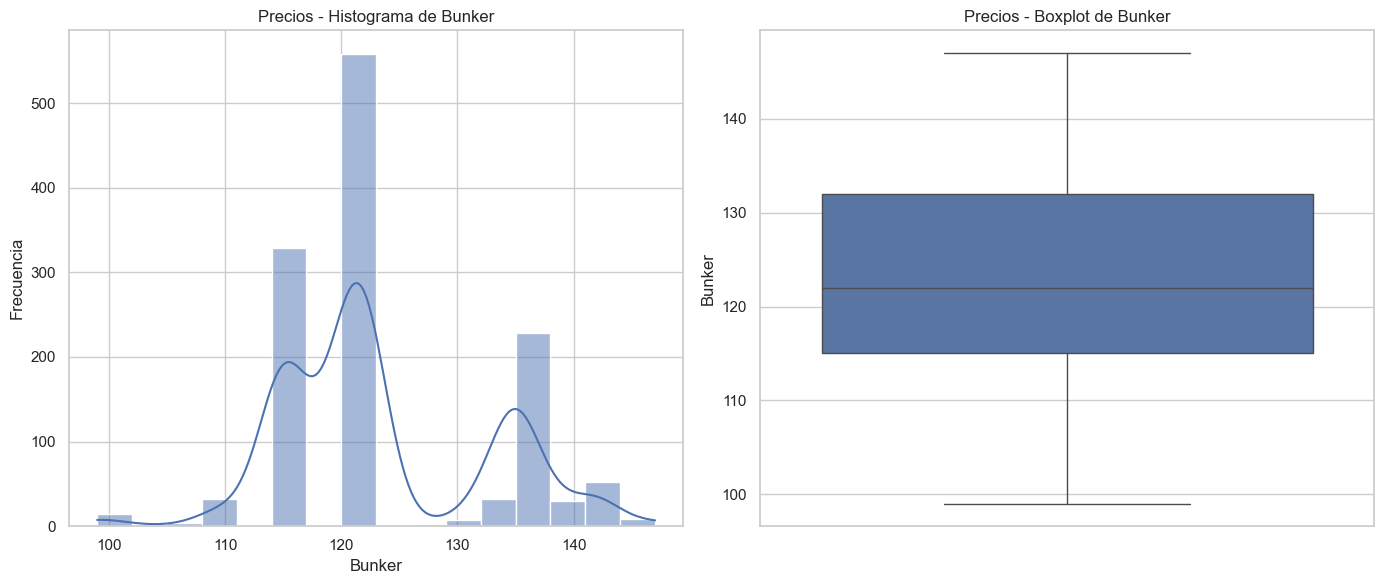

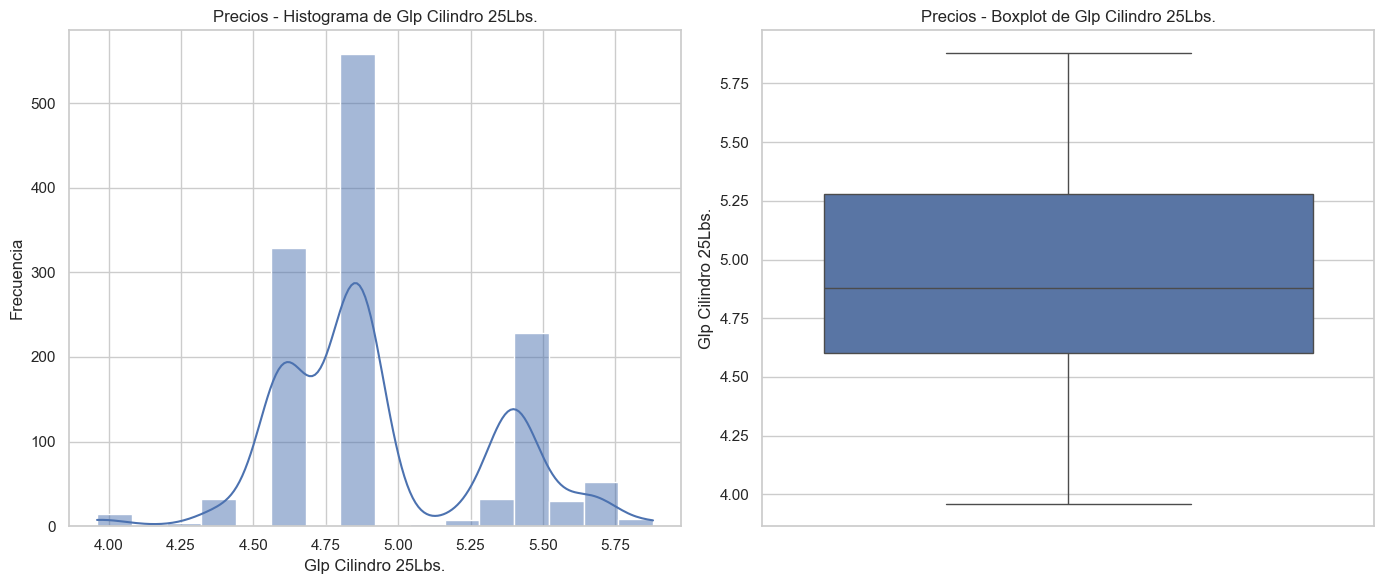

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

# Ejemplo de nombres ajustados (ajusta según lo que encuentres en el paso anterior)
columnas_consumo = ['Gasolina Super', 'Gasolina Regular', 'Diesel', 'Gas Licuado']
columnas_importacion = ['Gasolina Super', 'Gasolina Regular', 'Diesel', 'Gas Licuado']
columnas_precios = ['Superior', 'Regular', 'Diesel', 'Bunker', 'Glp Cilindro 25Lbs.']

# Función para graficar histogramas y boxplots de variables
def plot_distributions(df, columns, title_prefix):
    for column in columns:
        if column in df.columns:
            plt.figure(figsize=(14, 6))

            # Histograma
            plt.subplot(1, 2, 1)
            sns.histplot(df[column].dropna(), kde=True)
            plt.title(f'{title_prefix} - Histograma de {column}')
            plt.xlabel(column)
            plt.ylabel('Frecuencia')

            # Boxplot
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df[column].dropna())
            plt.title(f'{title_prefix} - Boxplot de {column}')
            plt.ylabel(column)

            plt.tight_layout()
            plt.show()
        else:
            print(f'Columna {column} no encontrada en el DataFrame.')

# Graficar distribuciones para datos de consumo, importación y precios
plot_distributions(consumo, columnas_consumo, 'Consumo')
plot_distributions(importacion, columnas_importacion, 'Importación')
plot_distributions(precios, columnas_precios, 'Precios')
